In [9]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from sklearn import preprocessing
import tensorflow as tf

In [11]:
os.chdir("C:/Users/arpit/Desktop/Projects/IPL_Score_Prediction_using_Deep_Learning")

In [35]:
ipl = pd.read_csv("ipl_data.csv")

ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [37]:
print(ipl.columns)

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')


In [47]:
df = ipl.drop(['mid', 'date','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker'], axis=1)

In [51]:
df.head()

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222


In [74]:
X = df.drop(['total'],axis=1)
y = df['total']

In [80]:
from sklearn.preprocessing import LabelEncoder

venue_encoder = LabelEncoder()
bat_team_encoder = LabelEncoder()
bowl_team_encoder = LabelEncoder()
batsman_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = bat_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowl_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = batsman_encoder.fit_transform(X['batsman'] )
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [87]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [95]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [99]:
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dense(216, activation='relu'),  
    keras.layers.Dense(1, activation='linear')  
])

huber_loss = tf.keras.losses.Huber(delta=1.0)  
model.compile(optimizer='adam', loss=huber_loss) 

In [103]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 19.4446 - val_loss: 19.2359
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 19.4958 - val_loss: 19.5030
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 19.4406 - val_loss: 19.0683
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 19.2683 - val_loss: 19.0909
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 19.2851 - val_loss: 18.8563
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 19.2153 - val_loss: 19.0289
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 19.0114 - val_loss: 18.7917
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 19.0423 - val_loss: 19.1853
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 18.9497 - val_loss: 18.7624
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 18.9088 - val_loss: 19.2782
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 18.9204 - val_loss: 18.5893
Epoch 12/50
832/832 ━━━━━━

<Axes: >

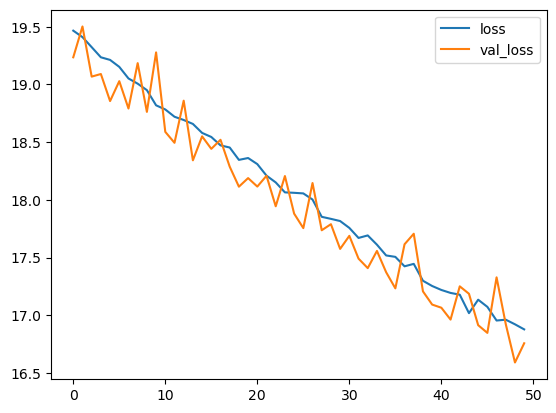

In [104]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [134]:
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


17.37379843944574